## ASTR600 - Cosmology - Problem Set 1 

**Author: William Cerny** 

**Due Date: 09/08/2023**


In [1]:
from scipy.integrate import quad
import matplotlib.pyplot as plt 
import numpy as np
plt.rc('font', family = 'serif')
plt.rc('axes', lw = 2)
plt.rc('text', usetex = True)

The full integral we wish to carry out is 

$$ \int_{0}^{z} \frac{dz}{[\Omega(1+z)^{3} + (1-\Omega)(1+z)^{3/2}]^{1/2}}$$ 

We can implement the integrand in Python as

In [2]:
def integrand(z, Omega):
    return (Omega * (1+z)**3 + (1-Omega)*(1+z)**1.5)**-0.5

In the limit where $\Omega = 0$, this simplifies to
$$ \int_{0}^{z} \frac{dz}{[(1+z)^{3/4}]}$$ 

which we can carry out through a simple change of variables x = 1+z

In the limit where $\Omega = 0$, this simplifies to
$$ \int x^{-3/4} dx =  4 x^{1/4} = 4(1+z)^{1/4} |_{0}^{z} = 4(1+z)^{1/4} - 4 $$ 

which we can easily make analytically:

In [3]:
def analytic_OmegaEqualsZero(z):
    return 4*(1+z)**0.25 -4

We can now do a similar analytic derivation for the case where $\Omega = 1$. In that limit, we have that 

$$ \int_{0}^{z} \frac{dz}{[(1+z)^{3}]^{1/2}} = \int_{0}^{z} (1+z)^{-3/2}dz$$ 

which, after the same change of variables becomes

$$ \int x^{-3/2} dx =  -2 x^{-1/2} = -2(1+z)^{-1/2} |_{0}^{z} = -2[(1+z)^{-1/2} - (1)^{-1/2}] =  -2[(1+z)^{-1/2} - 1]$$ 

In [4]:
def analytic_OmegaEqualsOne(z):
    return -2 * ((1+z)**-0.5 - 1)

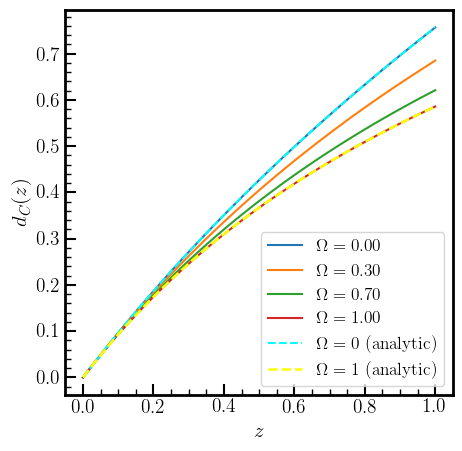

In [5]:
fig, ax = plt.subplots(1,1, figsize = (5,5))


Omega_values = [0,0.3,0.7,1]
zvalues = np.linspace(0,1,100)


## loop through values of Omega, and integrate up to some redshift z 
for OmegaVal in Omega_values: 
    integration_results = []
    for z in zvalues:


        integral, err = quad(integrand, 0, z, OmegaVal) ## main integration step
        integration_results.append(integral)
    ax.plot(zvalues, integration_results, label = r'$\Omega = %.2f$'%OmegaVal)

    
## Now add the analytic results
analyticResultZero = analytic_OmegaEqualsZero(zvalues)  
plt.plot(zvalues, analyticResultZero, ls = '--', label = r'$\Omega = 0$ (analytic)', lw = 1.5, color = 'cyan')

analyticResultOne = analytic_OmegaEqualsOne(zvalues)  
plt.plot(zvalues, analyticResultOne, ls = '--', label = r'$\Omega = 1$ (analytic)', lw = 1.8, color = 'yellow')


## stylistic controls
ax.tick_params(which = 'major', length = 8, width = 1.5, direction = 'in')
ax.tick_params(which = 'minor', length = 4, width = 1.0, direction = 'in')
ax.minorticks_on()
ax.set_xlabel(r'$z$', fontsize = 15)
ax.set_ylabel(r'$d_C (z)$', fontsize = 15)
ax.legend(loc = 'lower right', fontsize = 12.5)
ax.tick_params(labelsize = 14)

As apparent, the analytical calculations match the numerical integrations well.